In [9]:
import warnings
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getuser
sns.set(style="whitegrid", context="talk")
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
rutas_por_usuario = {
    "antmiguel": {
        "rawData": os.path.join(os.path.pardir, 'data', 'raw'),
        "externalData": os.path.join(os.path.pardir, 'data', 'external'),
        "interimData": os.path.join(os.path.pardir, 'data', 'interim'),
        "processedData": os.path.join(os.path.pardir, 'data', 'processed')
    },
    "jupyter": {
        'rawData': 'gs://ent-prd-sandbox-fdo-bucket/ent-prd-sandbox-fdo-bucket/ScoreCI/raw/',
        'externalData': 'gs://ent-prd-sandbox-fdo-bucket/ent-prd-sandbox-fdo-bucket/ScoreCI/external/',
        'interimData': 'gs://ent-prd-sandbox-fdo-bucket/ent-prd-sandbox-fdo-bucket/ScoreCI/interim/',
        'processedData': 'gs://ent-prd-sandbox-fdo-bucket/ent-prd-sandbox-fdo-bucket/ScoreCI/processed/'
    }
}

usuario = getuser()
rutas = rutas_por_usuario.get(usuario, {})

rutas

{'rawData': '..\\data\\raw',
 'externalData': '..\\data\\external',
 'interimData': '..\\data\\interim',
 'processedData': '..\\data\\processed'}

In [3]:
df = pd.read_csv(os.path.join(rutas.get('processedData'), 'analitica_modelo.csv'))

In [4]:
df.head()

,ASESOR_ID,PORC_CR_202407,PORC_CR_202410,PORC_CR_202408,PORC_CR_202405,PORC_CR_202409,PORC_CR_202406,y,y_predict,POSITION_DESC,ANT_JEFE,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_T2,CLIENTES_T1,CLIENTES_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,MONTO_CARTERA_T2,MONTO_CARTERA_T1,MONTO_CARTERA_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR90M_SIN_EXP_T2,CR90M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR90M_SIN_EXP_T1,CR90M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR90M_SIN_EXP_T0,CR90M_CON_EXP_T0,CONTRATOS_SIN_EXP_T2,CONTRATOS_CON_EXP_T2,CONTRATOS_SIN_EXP_T1,CONTRATOS_CON_EXP_T1,CONTRATOS_SIN_EXP_T0,CONTRATOS_CON_EXP_T0,CARTERA_SIN_EXP_T2,CARTERA_CON_EXP_T2,CARTERA_SIN_EXP_T1,CARTERA_CON_EXP_T1,CARTERA_SIN_EXP_T0,CARTERA_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2
0,79103237,0.0070,0.0080,0.0114,0.0000,0.0109,0.0074,0.0098,0.0061,ASESOR CI,35,17,3,2,3,421,0.000000,0.000000,0.000000,0.106667,0.111888,0.096774,1,1,1,150,155,160,109,111,115,41.0,44.0,45.0,11,9,14,5,15,9,7.860000,7.941935,7.862500,4.626667,4.612903,4.550000,150,155,160,66,71,75,6,5,9,4,2,4,146,152,158,148,154,159,8701659.77,9087482.15,9555704.54,73,71,1,0,4,0,0,1,79,72,0,0,2,0,2,0,86,72,0,0,2,0,0,0,2759629.49,5764786.51,18406.25,0.00,98836.28,0.00,0.00,60001.24,3301431.78,5687214.09,0.00,0.00,28863.19,0.00,69973.09,0.0,3782314.39,5697345.23,0.00,0.00,76044.92,0.00,0.0,0.0,78,72,83,72,88,72,2876872.02,5824787.75,3400268.06,5687214.09,3858359.31,5697345.23,1.346154,2.674699,0.545455,1.000000,0.000000,0.000000,0.000000,0.0,0.064706,0.094118,0.088235,0.7

<Figure size 1200x600 with 0 Axes>

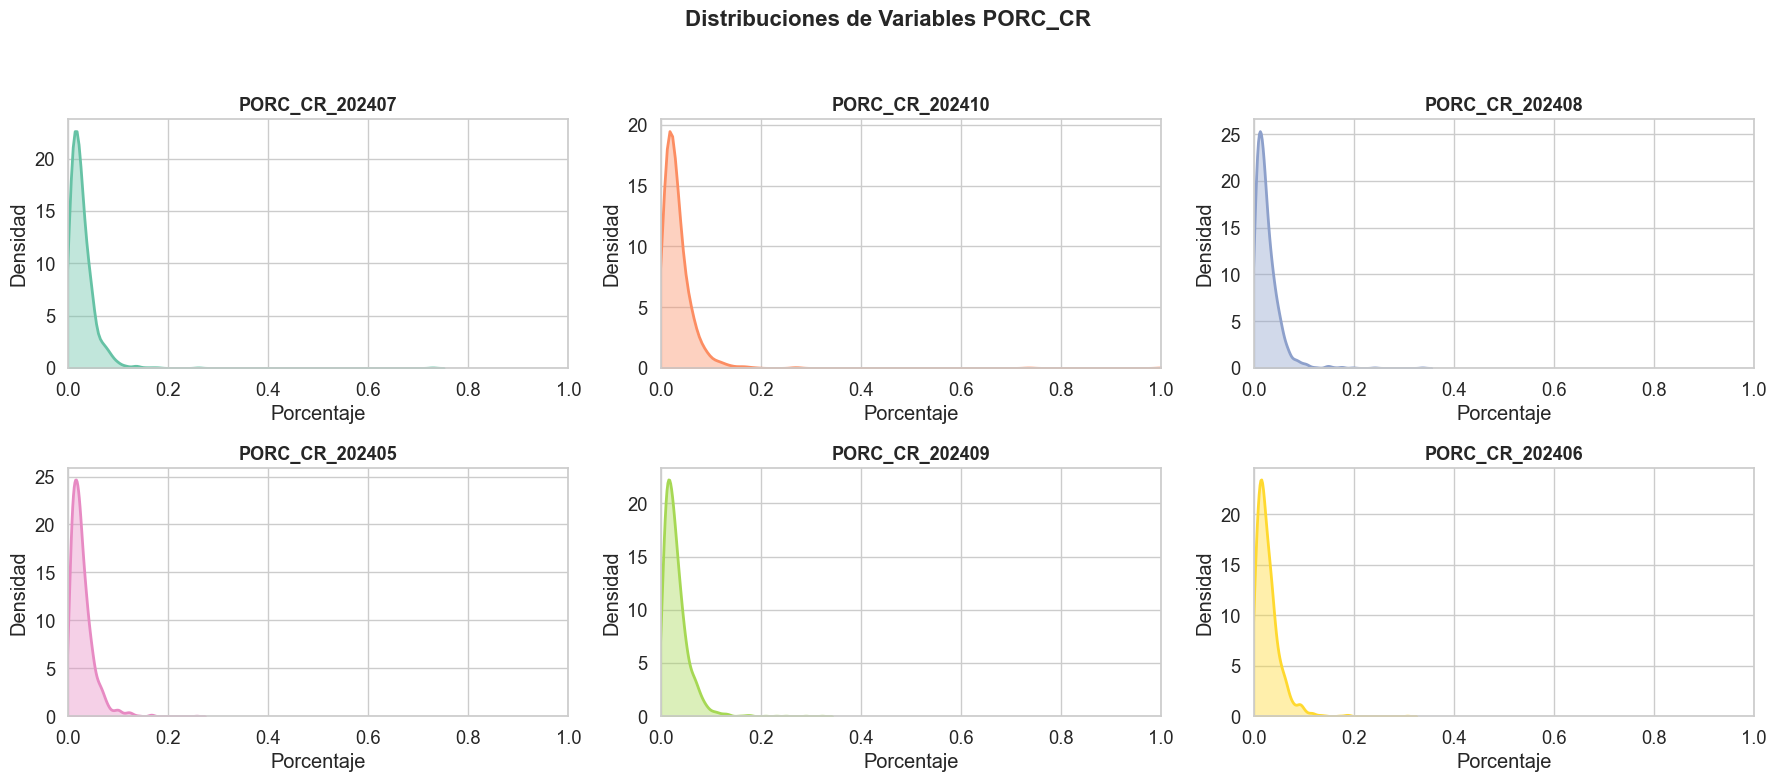

In [18]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)
df_porc = df.filter(like='PORC_CR')
plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, col in enumerate(df_porc.columns):
    sns.kdeplot(
        data=df,
        x=col,
        fill=True,
        alpha=0.4,
        linewidth=2,
        ax=axes[i],
        color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))]
    )
    axes[i].set_title(col, fontsize=13, weight='bold')
    axes[i].set_xlim(0, 1)
    axes[i].set_xlabel("Porcentaje")
    axes[i].set_ylabel("Densidad")

# Si hay menos de 6 variables, ocultamos los ejes sobrantes
for j in range(len(df_porc.columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustamos el layout para que no se encimen
plt.suptitle("Distribuciones de Variables PORC_CR", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

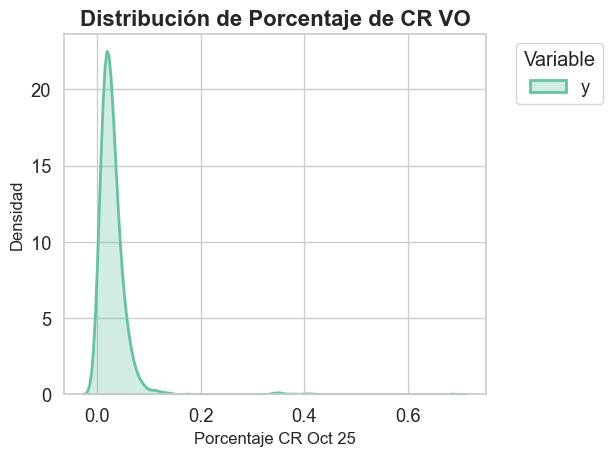

In [26]:
sns.kdeplot(
        data=df,
        x='y',
        fill=True,
        alpha=0.3,
        linewidth=2,
        label='y')

plt.title("Distribución de Porcentaje de CR VO", fontsize=16, weight='bold')
plt.xlabel("Porcentaje CR Oct 25", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

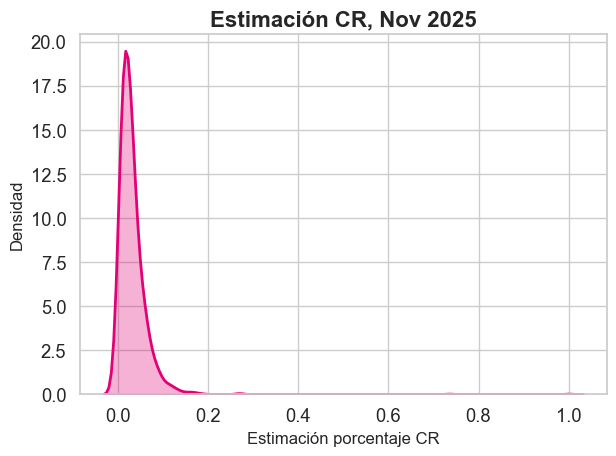

In [27]:
sns.kdeplot(
        data=df,
        x='PORC_CR_202410',
        fill=True,
        alpha=0.3,
        linewidth=2,
        color= '#E20177',
        label='')
plt.title("Estimación CR, Nov 2025", fontsize=16, weight='bold')
plt.xlabel("Estimación porcentaje CR", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
#plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [6]:
ls_limites = [-np.inf, 0.016, 0.025, np.inf]
ls_etiquetas = ['baja', 'media', 'alta']

df['segmentacion_cr'] = pd.cut(df['y'], bins=ls_limites, labels=ls_etiquetas, right=False)
df['segmentacion_cr_pred'] = pd.cut(df['y_predict'], bins=ls_limites, labels=ls_etiquetas, right=False)

In [7]:
pd.pivot_table(
    data=df,
    values='ASESOR_ID',
    index='segmentacion_cr',
    columns='segmentacion_cr_pred',
    aggfunc='count'
              ).reset_index()

segmentacion_cr_pred,segmentacion_cr,baja,media,alta
0,baja,258,74,61
1,media,134,81,90
2,alta,188,117,264


In [8]:
pd.pivot_table(
    data=df,
    values=['MONTO_PRESTADO_PROMEDIO_SE_T0','MONTO_PRESTADO_PROMEDIO_CE_T0','ASESOR_ID'],
    index='segmentacion_cr',
    columns='segmentacion_cr_pred',
    aggfunc={'MONTO_PRESTADO_PROMEDIO_SE_T0':'mean','MONTO_PRESTADO_PROMEDIO_CE_T0':'mean', 'ASESOR_ID':'count'}
              ).reset_index().to_clipboard()

In [9]:
# Total de clientes al corte, por nivel del asesor
pd.pivot_table(
    data=df,
    values=['CONTRATOS_SIN_EXP_T0','CONTRATOS_CON_EXP_T0'],
    index='segmentacion_cr',
    columns='segmentacion_cr_pred',
    aggfunc={'CONTRATOS_SIN_EXP_T0':'sum','CONTRATOS_CON_EXP_T0':'sum'}
              ).reset_index().to_clipboard()

In [10]:
# First payment default
df.V.describe(percentiles=[.2,.4,.6,.8,.9,.95])

count    1267.000000
mean        0.104577
std         0.063319
min         0.000000
20%         0.055556
40%         0.081395
50%         0.093458
60%         0.105263
80%         0.149124
90%         0.185033
95%         0.215636
max         1.000000
Name: PCNT_FPD_T0, dtype: float64

In [42]:
ls_limites = [-np.inf, 0.05, 0.1,.15, np.inf]
ls_etiquetas = ['Q1', 'Q2', 'Q3','Q4']

df['FPD_Q'] = pd.cut(df['PCNT_FPD_T0'], bins=ls_limites, labels=ls_etiquetas, right=False)

In [45]:
pd.pivot_table(
    data=df,
    values=['ASESOR_ID'],
    index='FPD_Q',
    columns='segmentacion_cr',
    aggfunc={'ASESOR_ID':'count'}
              ).reset_index().to_clipboard()

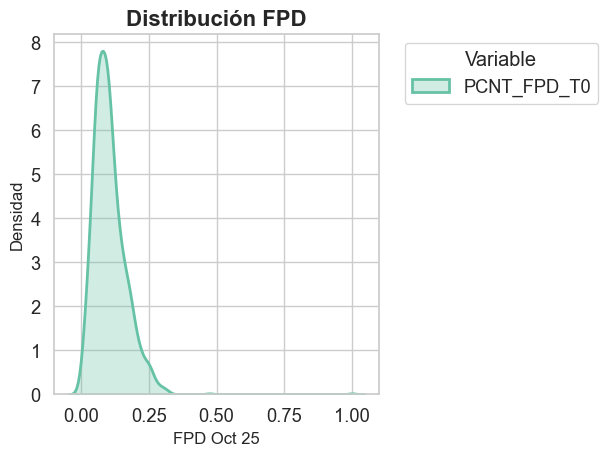

In [41]:
sns.kdeplot(
        data=df,
        x='PCNT_FPD_T0',
        fill=True,
        alpha=0.3,
        linewidth=2,
        label='PCNT_FPD_T0')

plt.title("Distribución FPD", fontsize=16, weight='bold')
plt.xlabel("FPD Oct 25", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

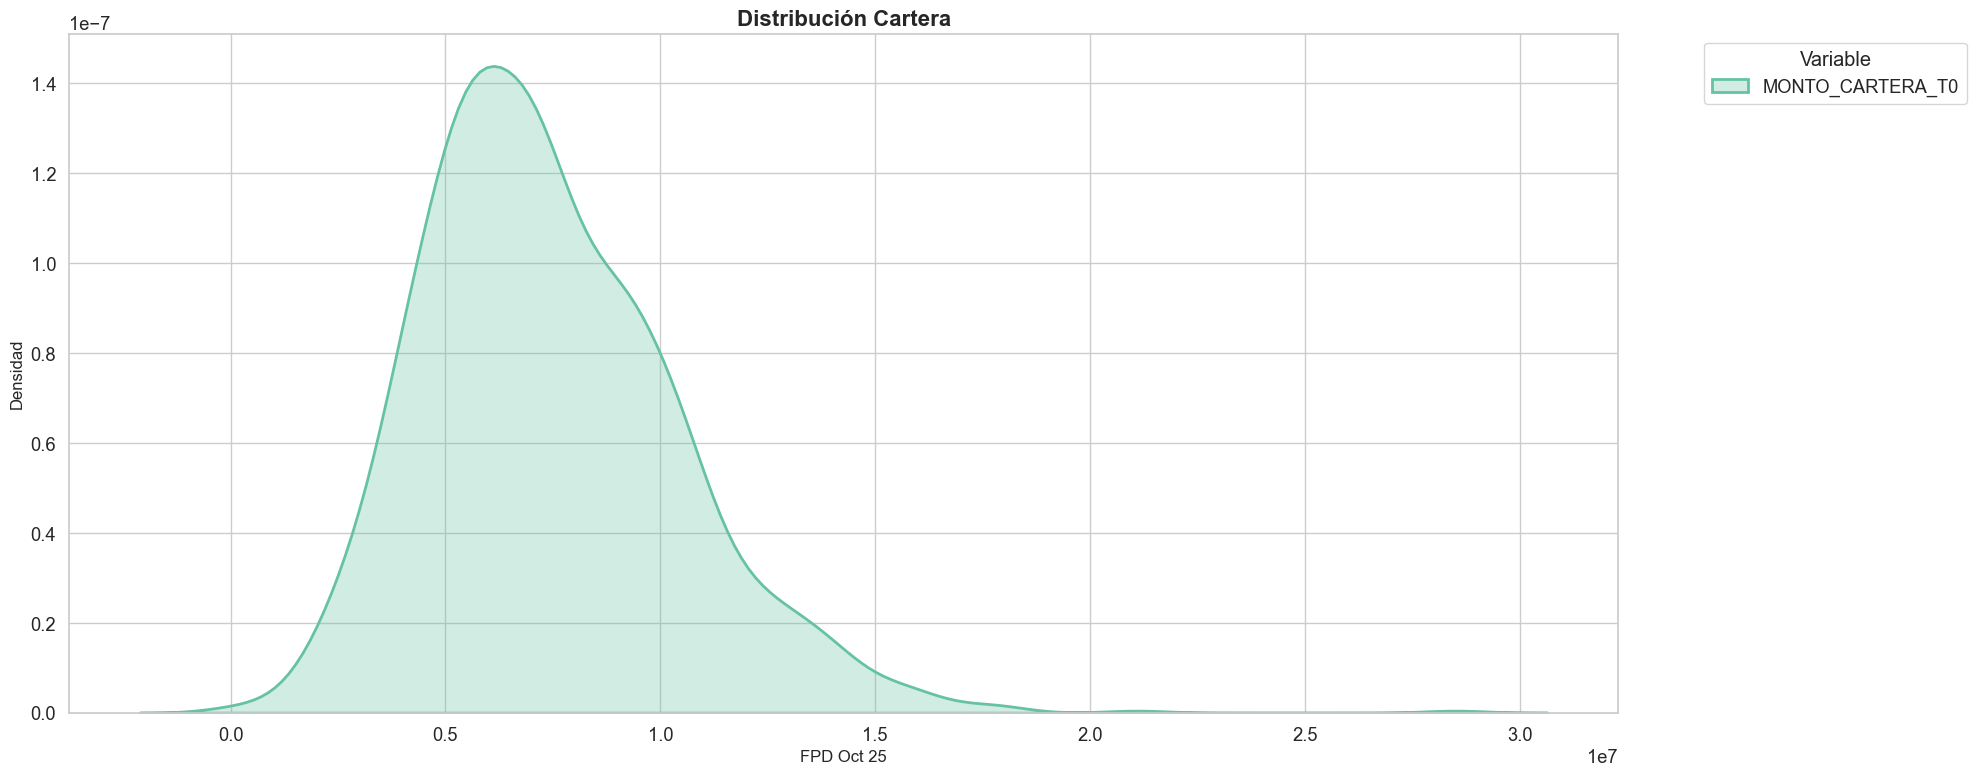

In [48]:
plt.figure(figsize=(20, 8))
sns.kdeplot(
        data=df,
        x='MONTO_CARTERA_T0',
        fill=True,
        alpha=0.3,
        linewidth=2,
        label='MONTO_CARTERA_T0')

plt.title("Distribución Cartera", fontsize=16, weight='bold')
plt.xlabel("FPD Oct 25", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Variable", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

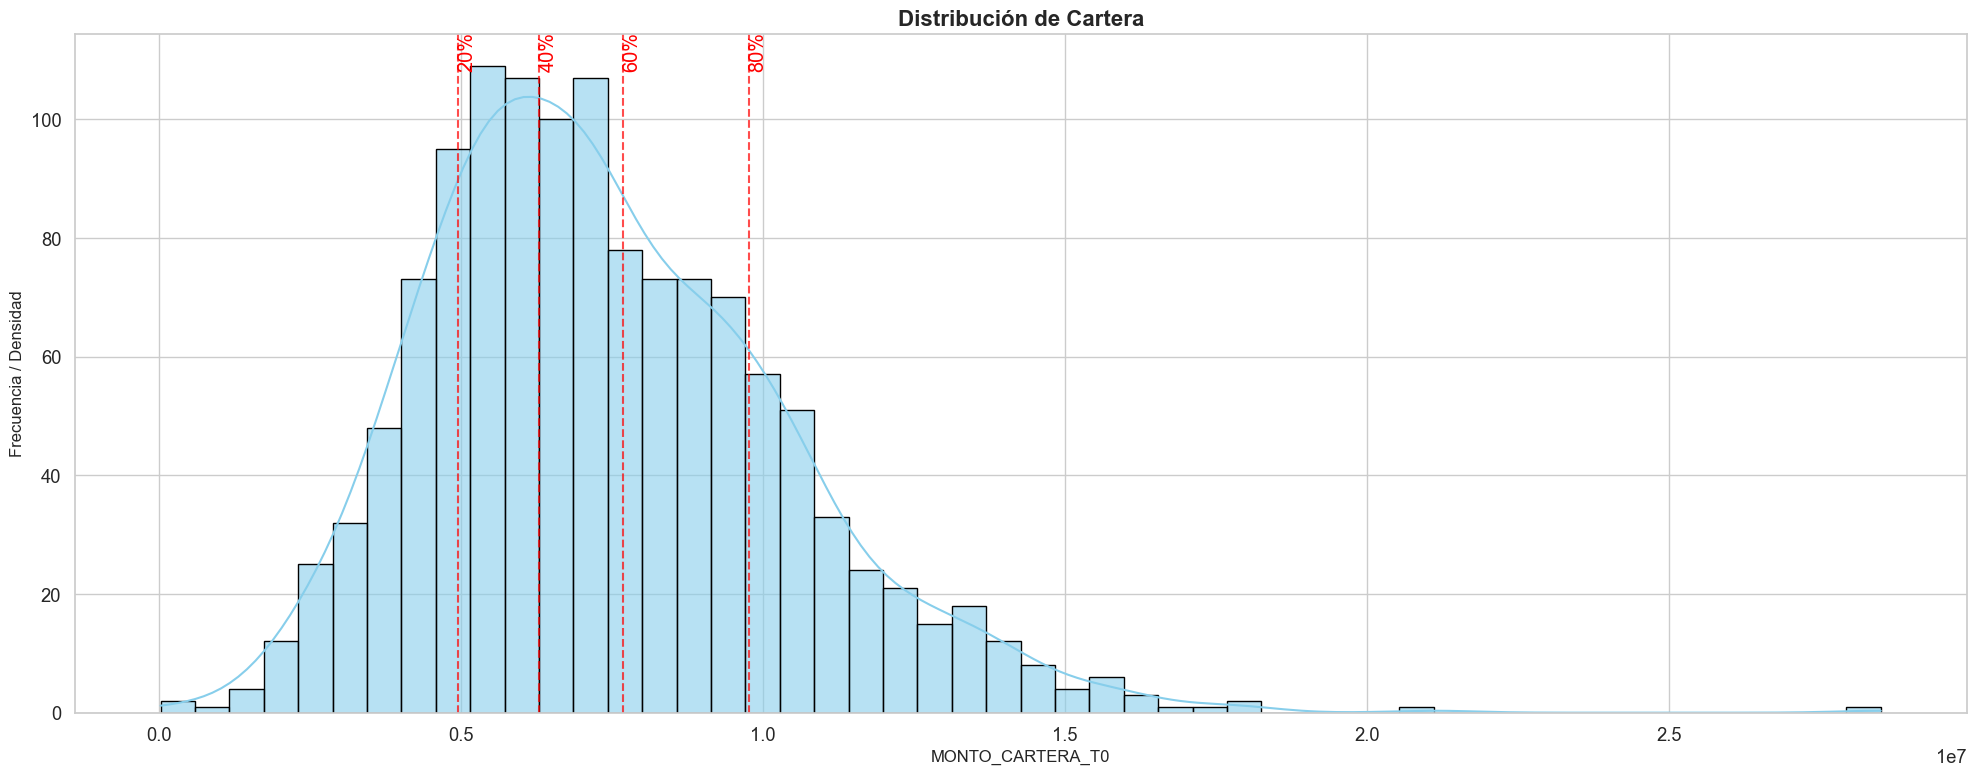

In [57]:
plt.figure(figsize=(20, 8))
sns.histplot(
    data=df,
    x='MONTO_CARTERA_T0',
    bins=50,
    kde=True,
    color='skyblue',
    alpha=0.6,
    edgecolor='black'
)

# Líneas verticales en percentiles para contexto
for p in [0.2, 0.4, 0.6, 0.8]:
    valor = df['MONTO_CARTERA_T0'].quantile(p)
    plt.axvline(valor, linestyle='--', color='red', alpha=0.7)
    plt.text(valor, plt.ylim()[1]*0.95, f'{int(p*100)}%', color='red', rotation=90)

plt.title("Distribución de Cartera", fontsize=16, weight='bold')
plt.xlabel("MONTO_CARTERA_T0", fontsize=12)
plt.ylabel("Frecuencia / Densidad", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df['RANGO_CARTERA'] = pd.qcut(df['MONTO_CARTERA_T0'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

In [54]:
pd.pivot_table(
    data=df,
    values=['ASESOR_ID'],
    index='RANGO_CARTERA',
    columns='segmentacion_cr',
    aggfunc={'ASESOR_ID':'count'}
              ).reset_index().to_clipboard()

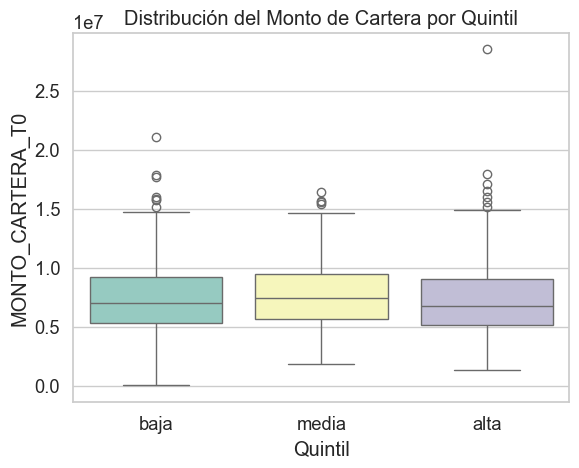

In [105]:
sns.boxplot(x='segmentacion_cr', y='MONTO_CARTERA_T0', data=df, palette="Set3")
plt.title("Distribución del Monto de Cartera por Quintil")
plt.xlabel("Quintil")
plt.ylabel("MONTO_CARTERA_T0")
plt.show()

## METRICAS

In [58]:
df.head()

,ASESOR_ID,PORC_CR_202407,PORC_CR_202410,PORC_CR_202408,PORC_CR_202405,PORC_CR_202409,PORC_CR_202406,y,y_predict,POSITION_DESC,ANT_JEFE,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_T2,CLIENTES_T1,CLIENTES_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,MONTO_CARTERA_T2,MONTO_CARTERA_T1,MONTO_CARTERA_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR90M_SIN_EXP_T2,CR90M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR90M_SIN_EXP_T1,CR90M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR90M_SIN_EXP_T0,CR90M_CON_EXP_T0,CONTRATOS_SIN_EXP_T2,CONTRATOS_CON_EXP_T2,CONTRATOS_SIN_EXP_T1,CONTRATOS_CON_EXP_T1,CONTRATOS_SIN_EXP_T0,CONTRATOS_CON_EXP_T0,CARTERA_SIN_EXP_T2,CARTERA_CON_EXP_T2,CARTERA_SIN_EXP_T1,CARTERA_CON_EXP_T1,CARTERA_SIN_EXP_T0,CARTERA_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2,segmentacion_cr,segmentacion_cr_pred,FPD_Q,RANGO CARTERA,RANGO_CARTERA
0,79103237,0.0070,0.0080,0.0114,0.0000,0.0109,0.0074,0.0098,0.0061,ASESOR CI,35,17,3,2,3,421,0.000000,0.000000,0.000000,0.106667,0.111888,0.096774,1,1,1,150,155,160,109,111,115,41.0,44.0,45.0,11,9,14,5,15,9,7.860000,7.941935,7.862500,4.626667,4.612903,4.550000,150,155,160,66,71,75,6,5,9,4,2,4,146,152,158,148,154,159,8701659.77,9087482.15,9555704.54,73,71,1,0,4,0,0,1,79,72,0,0,2,0,2,0,86,72,0,0,2,0,0,0,2759629.49,5764786.51,18406.25,0.00,98836.28,0.00,0.00,60001.24,3301431.78,5687214.09,0.00,0.00,28863.19,0.00,69973.09,0.0,3782314.39,5697345.23,0.00,0.00,76044.92,0.00,0.0,0.0,78,72,83,72,88,72,2876872.02,5824787.75,3400268.06,5687214.09,3858359.31,5697345.23,1.346154,2.674699,0.545455

In [104]:
pd.pivot_table(
    data=df,
    values=[
        'ASESOR_ID','ANT_ASESOR','HORAS_VUELO','AVG_CICLOS_EJE_T0','CLIENTES_T0','CONTRATOS_SIN_EXP_T0','CONTRATOS_CON_EXP_T0',
        'AVG_CICLOS_CI_T0','CARTERA_CON_EXP_T0','CARTERA_SIN_EXP_T0','AVG_ATRASO_ACT_EXP_T0','AVG_ATRASO_ACT_SIN_EXP_T0',
        'MONTO_PRESTADO_PROMEDIO_SE_T0','MONTO_PRESTADO_PROMEDIO_CE_T0','PORC_CR_202410','PORC_CR_202409','PORC_CR_202408',
        'PCNT_FPD_T0','CTES0_SIN_EXP_T0','CTES0_CON_EXP_T0',
        'CTES1A7_SIN_EXP_T0','CTES1A7_CON_EXP_T0','CTES8A60_SIN_EXP_T0','CTES8A60_CON_EXP_T0',
        'CTES60M_SIN_EXP_T0','CTES60M_CON_EXP_T0',
        'CR0_SIN_EXP_T0','CR0_CON_EXP_T0','CR1A7_SIN_EXP_T0','CR1A7_CON_EXP_T0',
        'CR8A60_SIN_EXP_T0','CR8A60_CON_EXP_T0','CR90M_SIN_EXP_T0','CR90M_CON_EXP_T0'
           ],
    columns='segmentacion_cr',
    #index='ANT_ASESOR',
    aggfunc={'ANT_ASESOR':['mean'],'HORAS_VUELO':['mean'],'AVG_CICLOS_EJE_T0':'mean',
             'CLIENTES_T0':['sum','mean'],'CONTRATOS_SIN_EXP_T0':['sum','mean'],'CONTRATOS_CON_EXP_T0':['sum','mean'],
             'ASESOR_ID':'count','AVG_CICLOS_CI_T0':'mean',#'CARTERA_CON_EXP_T0':'mean',
             #'CARTERA_SIN_EXP_T0':'mean',
             'AVG_ATRASO_ACT_EXP_T0':'mean','AVG_ATRASO_ACT_SIN_EXP_T0':'mean',
             'MONTO_PRESTADO_PROMEDIO_SE_T0':'mean','MONTO_PRESTADO_PROMEDIO_CE_T0':'mean','PORC_CR_202410':['min','mean','max'],
             'PORC_CR_202409':['min','mean','max'],'PORC_CR_202408':['min','mean','max'],'PCNT_FPD_T0':'mean',
             'CTES0_SIN_EXP_T0':'mean','CTES0_CON_EXP_T0':'mean',
             'CTES1A7_SIN_EXP_T0':'mean','CTES1A7_CON_EXP_T0':'mean',
             'CTES8A60_SIN_EXP_T0':'mean','CTES8A60_CON_EXP_T0':'mean',
             'CTES60M_SIN_EXP_T0':'mean','CTES60M_CON_EXP_T0':'mean',
             'CR0_SIN_EXP_T0':'mean','CR0_CON_EXP_T0':'mean','CR1A7_SIN_EXP_T0':'mean','CR1A7_CON_EXP_T0':'mean',
             'CR8A60_SIN_EXP_T0':'mean','CR8A60_CON_EXP_T0':'mean','CR90M_SIN_EXP_T0':'mean','CR90M_CON_EXP_T0':'mean'
            }
).reset_index()

segmentacion_cr,level_0,level_1,baja,media,alta
0,ANT_ASESOR,mean,6.180407e+01,6.374754e+01,5.402285e+01
1,ASESOR_ID,count,3.930000e+02,3.050000e+02,5.690000e+02
2,AVG_ATRASO_ACT_EXP_T0,mean,1.273238e+00,1.574735e+00,2.122449e+00
3,AVG_ATRASO_ACT_SIN_EXP_T0,mean,6.208099e-01,6.694683e-01,1.039838e+00
4,AVG_CICLOS_CI_T0,mean,3.447453e+00,3.343336e+00,3.176110e+00
5,AVG_CICLOS_EJE_T0,mean,7.406702e+00,7.441597e+00,6.982935e+00
6,CLIENTES_T0,mean,1.510433e+02,1.580328e+02,1.477663e+02
7,CLIENTES_T0,sum,5.936000e+04,4.820000e+04,8.407900e+04
8,CONTRATOS_CON_EXP_T0,mean,4.925700e+01,4.830164e+01,4.299473e+01
9,CONTRATOS_CON_EXP_T0,sum,1.935800e+04,1.473200e+04,2.446400e+04


In [83]:
df.groupby('segmentacion_cr').agg({'CARTERA_SIN_EXP_T0':['min','mean','max'], 'CARTERA_CON_EXP_T0':['min','mean','max']})

CARTERA_SIN_EXP_T0                             \
                               min          mean          max   
segmentacion_cr                                                 
baja                      24219.56  4.437852e+06  12340392.00   
media                   1596848.29  4.736606e+06  12895073.84   
alta                    1309322.71  4.603828e+06  25613269.78   

                CARTERA_CON_EXP_T0                             
                               min          mean          max  
segmentacion_cr                                                
baja                           0.0  2.975093e+06  13104583.68  
media                          0.0  2.954535e+06  10336484.58  
alta                           0.0  2.620096e+06  11239105.41

In [84]:
df['cartera_promedio_ce'] = df['CARTERA_CON_EXP_T0']/df['CONTRATOS_CON_EXP_T0']
df['cartera_promedio_se'] = df['CARTERA_SIN_EXP_T0']/df['CONTRATOS_SIN_EXP_T0']

In [85]:
df.sort_values(by='MONTO_CARTERA_T0', ascending=False)#220

,ASESOR_ID,PORC_CR_202407,PORC_CR_202410,PORC_CR_202408,PORC_CR_202405,PORC_CR_202409,PORC_CR_202406,y,y_predict,POSITION_DESC,ANT_JEFE,ANT_ASESOR,C_COBRANZA_T0,C_COBRANZA_T1,C_COBRANZA_T2,HORAS_VUELO,PORCT_RENOV_T2,PORCT_RENOV_T1,PORCT_RENOV_T0,PCNT_FPD_T2,PCNT_FPD_T1,PCNT_FPD_T0,TOT_AMI_T2,TOT_AMI_T1,TOT_AMI_T0,TOT_MAC_T2,TOT_MAC_T1,TOT_MAC_T0,TOT_SINVC_T2,TOT_SINVC_T1,TOT_SINVC_T0,TOT_VC_T2,TOT_VC_T1,TOT_VC_T0,DESEMBOLSOS_SIN_EXP_T2,DESEMBOLSOS_CON_EXP_T2,DESEMBOLSOS_SIN_EXP_T1,DESEMBOLSOS_CON_EXP_T1,DESEMBOLSOS_SIN_EXP_T0,DESEMBOLSOS_CON_EXP_T0,AVG_CICLOS_EJE_T2,AVG_CICLOS_EJE_T1,AVG_CICLOS_EJE_T0,AVG_CICLOS_CI_T2,AVG_CICLOS_CI_T1,AVG_CICLOS_CI_T0,CLIENTES_T2,CLIENTES_T1,CLIENTES_T0,CLIENTES_EXPERIENCIA_GRUPAL_T2,CLIENTES_EXPERIENCIA_GRUPAL_T1,CLIENTES_EXPERIENCIA_GRUPAL_T0,NUEVOS_PRODUCTO_T2,NUEVOS_PRODUCTO_T1,NUEVOS_PRODUCTO_T0,NUEVOS_PUROS_T2,NUEVOS_PUROS_T1,NUEVOS_PUROS_T0,SEGURO_FAMILIAR_T2,SEGURO_FAMILIAR_T1,SEGURO_FAMILIAR_T0,SEGURO_VOLUNTARIO_T2,SEGURO_VOLUNTARIO_T1,SEGURO_VOLUNTARIO_T0,MONTO_CARTERA_T2,MONTO_CARTERA_T1,MONTO_CARTERA_T0,CTES0_SIN_EXP_T2,CTES0_CON_EXP_T2,CTES1A7_SIN_EXP_T2,CTES1A7_CON_EXP_T2,CTES8A60_SIN_EXP_T2,CTES8A60_CON_EXP_T2,CTES60M_SIN_EXP_T2,CTES60M_CON_EXP_T2,CTES0_SIN_EXP_T1,CTES0_CON_EXP_T1,CTES1A7_SIN_EXP_T1,CTES1A7_CON_EXP_T1,CTES8A60_SIN_EXP_T1,CTES8A60_CON_EXP_T1,CTES60M_SIN_EXP_T1,CTES60M_CON_EXP_T1,CTES0_SIN_EXP_T0,CTES0_CON_EXP_T0,CTES1A7_SIN_EXP_T0,CTES1A7_CON_EXP_T0,CTES8A60_SIN_EXP_T0,CTES8A60_CON_EXP_T0,CTES60M_SIN_EXP_T0,CTES60M_CON_EXP_T0,CR0_SIN_EXP_T2,CR0_CON_EXP_T2,CR1A7_SIN_EXP_T2,CR1A7_CON_EXP_T2,CR8A60_SIN_EXP_T2,CR8A60_CON_EXP_T2,CR90M_SIN_EXP_T2,CR90M_CON_EXP_T2,CR0_SIN_EXP_T1,CR0_CON_EXP_T1,CR1A7_SIN_EXP_T1,CR1A7_CON_EXP_T1,CR8A60_SIN_EXP_T1,CR8A60_CON_EXP_T1,CR90M_SIN_EXP_T1,CR90M_CON_EXP_T1,CR0_SIN_EXP_T0,CR0_CON_EXP_T0,CR1A7_SIN_EXP_T0,CR1A7_CON_EXP_T0,CR8A60_SIN_EXP_T0,CR8A60_CON_EXP_T0,CR90M_SIN_EXP_T0,CR90M_CON_EXP_T0,CONTRATOS_SIN_EXP_T2,CONTRATOS_CON_EXP_T2,CONTRATOS_SIN_EXP_T1,CONTRATOS_CON_EXP_T1,CONTRATOS_SIN_EXP_T0,CONTRATOS_CON_EXP_T0,CARTERA_SIN_EXP_T2,CARTERA_CON_EXP_T2,CARTERA_SIN_EXP_T1,CARTERA_CON_EXP_T1,CARTERA_SIN_EXP_T0,CARTERA_CON_EXP_T0,AVG_ATRASO_ACT_EXP_T2,AVG_ATRASO_ACT_EXP_T1,AVG_ATRASO_ACT_EXP_T0,AVG_ATRASO_ACT_SIN_EXP_T2,AVG_ATRASO_ACT_SIN_EXP_T1,AVG_ATRASO_ACT_SIN_EXP_T0,TIME_BUSINESS_INDEFINIDO,TIME_BUSINESS_DEFAULT,TIME_BUSINESS_2,TIME_BUSINESS_3,TIME_BUSINESS_4,TIME_BUSINESS_5,EDAD_MASCULINO,EDAD_FEMENINO,PORC_FEMENINO,SECTOR_8,SECTOR_22,SECTOR_28,SECTOR_30,MONTO_PRESTADO_PROMEDIO_SE_T2,MONTO_PRESTADO_PROMEDIO_CE_T2,MONTO_PRESTADO_PROMEDIO_SE_T1,MONTO_PRESTADO_PROMEDIO_CE_T1,MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0,PCNT_DESEMBOLSO_TDD,DETERIORO8A60_T2,DETERIORO8A60_T1,DETERIORO8A60_T0,SE_MANTIENE_0_PCT_T0,SE_MANTIENE_ATRASO_PCT_T0,MEJORA_PCT_T0,EMPEORA_T0,SE_MANTIENE_0_PCT_T1,SE_MANTIENE_ATRASO_PCT_T1,MEJORA_PCT_T1,EMPEORA_T1,SE_MANTIENE_0_PCT_T2,SE_MANTIENE_ATRASO_PCT_T2,MEJORA_PCT_T2,EMPEORA_T2,SE_MANTIENE_0_PCT_CATS_T0,SE_MANTIENE_ATRASO_PCT_CATS_T0,MEJORA_PCT_CATS_T0,EMPEORA_CATS_T0,SE_MANTIENE_0_PCT_CATS_T1,SE_MANTIENE_ATRASO_PCT_CATS_T1,MEJORA_PCT_CATS_T1,EMPEORA_CATS_T1,SE_MANTIENE_0_PCT_CATS_T2,SE_MANTIENE_ATRASO_PCT_CATS_T2,MEJORA_PCT_CATS_T2,EMPEORA_CATS_T2,segmentacion_cr,segmentacion_cr_pred,FPD_Q,RANGO CARTERA,RANGO_CARTERA,cartera_promedio_ce,cartera_promedio_se
102,43763618,0.0034,0.0167,0.0230,0.0049,0.0042,0.0015,0.0905,0.0297,ASESOR CI,139,66,10,4,7,514,0.000000,0.000000,0.000000,0.090047,0.096330,0.094241,4,6,6,211,218,220,192,200,202,19.0,18.0,18.0,17,4,22,1,23,6,5.606635,5.495413,5.622727,2.094787,2.100917,2.168182,211,218,220,93,97,97,5,11,8,5,6,6,198,204,206,205,211,212,24627307.36,26147487.86,28499024.99,171,22,10,0,8,0,0,0,185,21,5,1,6,0,0,0,174,25,10,0,10,1,0,0,20662958.22,2341955.33,1055367.84,0.00,567025.97,0.00,0.00,0.0,23623642.10,2062147.26,149083.33,203078.36,109536.81,0.00,0.00,0.0,23783331.40,2682676.85,1556378.25,0.00,273560.13,203078.36,0.0,0.0,189,22,196,22,194,26,22285352.03,234

In [ ]:
MONTO_PRESTADO_PROMEDIO_SE_T0,MONTO_PRESTADO_PROMEDIO_CE_T0

In [25]:
cadena = 'aLice'

In [29]:
cadena[0].upper()+cadena[1:].lower()

'Alice'

In [28]:
cadena[1:]

'Lice'

In [7]:
dictEm = {'employee_id':[2,3,7,8,9], 'name':['Meir','Michele','Addilyn','Juan','Kannon'],'salary':[3000,3800,7400,6100,7700]}

In [10]:
df = pd.DataFrame(dictEm)

In [23]:
df['bonus'] = df.apply(lambda row: 0 if ((row['employee_id'] % 2 == 0) | (row['name'].startswith('M'))) else row['salary'], axis = 1)

In [24]:
df.head()

,employee_id,name,salary,bonus
0,2,Meir,3000,0
1,3,Michele,3800,0
2,7,Addilyn,7400,7400
3,8,Juan,6100,0
4,9,Kannon,7700,7700
